<a href="https://colab.research.google.com/github/abhi-shek-solanki/play-store-data-analysis/blob/main/1stcapston_project_Play_Store_App_Review_Analysis_solution_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **!!! - In todays era or world there are lots of and many different different apps available in playstore due to which people gets comfuse sometimes like which app to download like if you just search pdf reader in google play store you will get lots and lots of app corresponding to pdf reader and you 'll get comfuse which to download from that data .Generally most of the people like to download that kind of application which are highly rated by people and also which app has been most downloaded by people the more the download the more the popular that app would be so lets start and analysis our data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lets first import our data 

In [3]:
file_path1 = "/content/drive/MyDrive/almabetter/capston project 1 data and files/Copy of Play Store Data.csv"
play_store_data = pd.read_csv(file_path1)

In [4]:
file_path2 = "/content/drive/MyDrive/almabetter/capston project 1 data and files/Copy of User Reviews.csv"

play_store_review = pd.read_csv(file_path2)

In [5]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# lets check which are the columns present in our data
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
play_store_data.index[play_store_data["Category"]=="1.9"]
play_store_data.drop([10472] , axis = 0 ,inplace = True)
#removing this value because it is coming everywhere and also it is useless

## 1 - LETS ANALYS CATEGORY COLUMN

In [8]:
# Lets see which category is mostly present in our data

play_store_data.Category.unique()



array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)



*   So we got this much above categories in our given data lets see which is the most frequent category




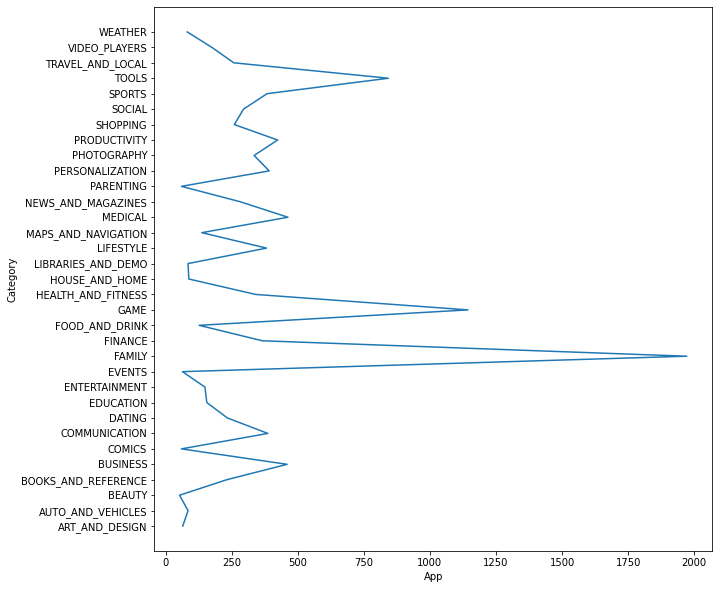

In [9]:
# from our data lets see which is the most frequent category 
# lets see which category is most widly used by developer to develope that kind of app
category_used_most = play_store_data.groupby('Category')["App"].count().reset_index()
plt.rcParams["figure.figsize"]= (10,10)
x_axis =category_used_most["App"]
plt.xlabel("App")
y_axis =category_used_most["Category"]
plt.ylabel("Category")

plt.plot(x_axis,y_axis)
plt.show()




*   So from the above we can say that the most frequent categories are family,games and tools followed by rest all the categories



## 2 - LETS ANANLYS RATING COLUMN

In [10]:
play_store_data["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

By the above list we can say that most of our rating is around 4.20 

Now lets see categories mean rating in our given data

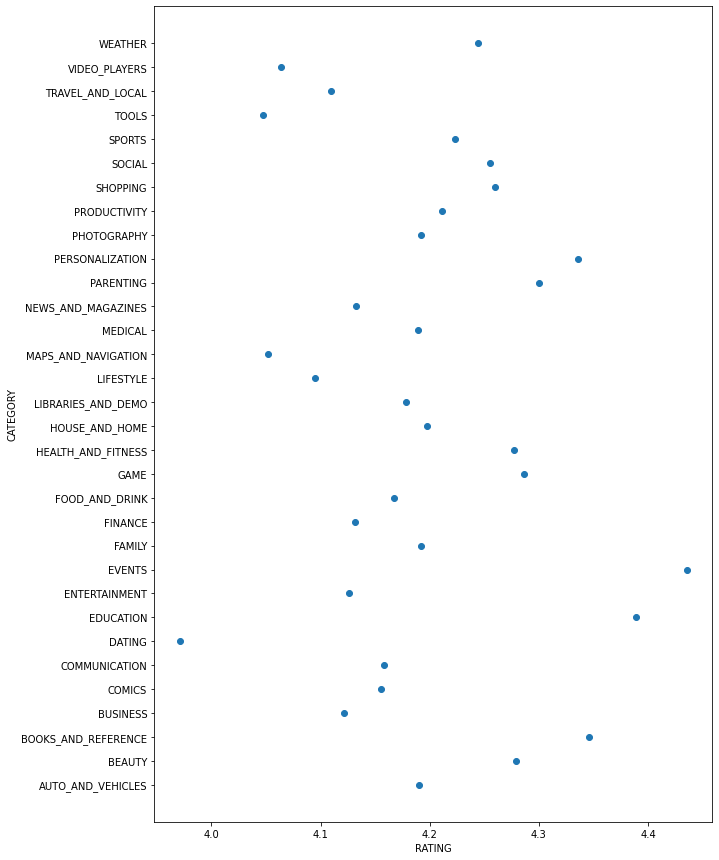

In [11]:
categories_rating = play_store_data.groupby("Category")["Rating"].mean().reset_index()
categories_rating
# here there is an an data called 1.9 menas wrong data in rating so we need to remove this row see what i have told u in the beginning that why removing this 
categories_rating.drop([0],axis = 0,inplace=True)
categories_rating
plt.rcParams['figure.figsize'] = (10, 15)    # setting up the figure size of our data so all the things gets easily visible
x_axis = categories_rating['Rating']
plt.xlabel("RATING")
y_axis = categories_rating['Category']
plt.ylabel("CATEGORY")


plt.scatter(x_axis,y_axis)
plt.show()

education events and parenting and personalization are the ones who got mean rating high as per their download  i am not saying that these are good apps rest all are good whose mean rating is above 4

# 3 - Installs

Lets see install column as it is of object data type lets first it convert to int or float

In [12]:
play_store_data['Installs'] = play_store_data.Installs.str.replace(",","")
play_store_data['Installs'] = play_store_data.Installs.str.replace("+","")
play_store_data['Installs'] = play_store_data.Installs.replace("Free",np.nan)
play_store_data['Installs'] = play_store_data['Installs'].astype(float)
play_store_data['Installs'].dtype




<ipython-input-12-66331d165589>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_data['Installs'] = play_store_data.Installs.str.replace("+","")


dtype('float64')

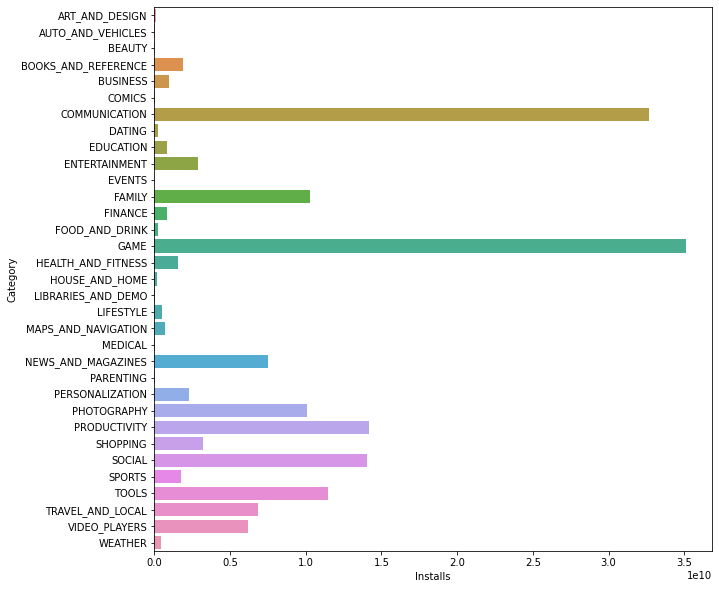

In [13]:
# now as our installs change in float lets analys it
# lets see which category got how much installed

most_installed_category = play_store_data.groupby("Category")["Installs"].sum()

plt.rcParams['figure.figsize'] = (10, 10)    # setting up the figure size of our data so all the things gets easily visible
sns.barplot(x=most_installed_category, y=most_installed_category.index, data=play_store_data)

By seeing the above data the gaming category got more installed following by communication and rest all category .

## 4 - FREE VS PAID App 

<ipython-input-14-1dfbc16afb2c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_data['Price'] = play_store_data.Price.str.replace("$","").astype(float)


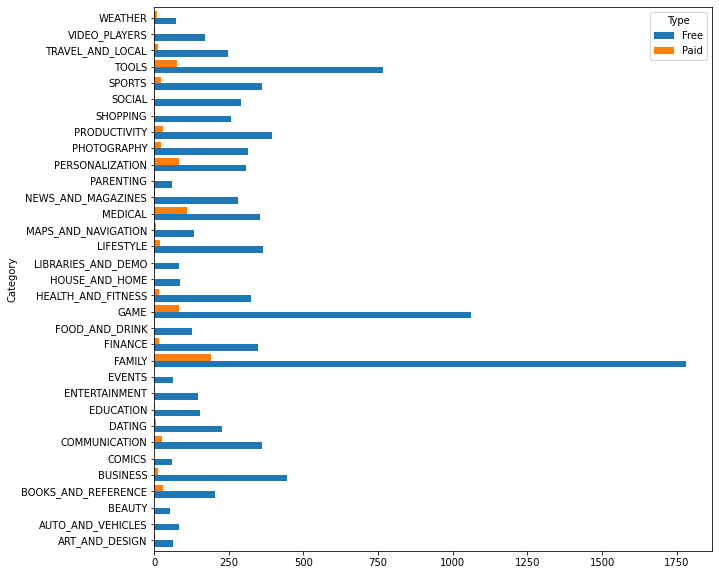

In [14]:
# converting price value from object to float so it can be easy to analys
play_store_data['Price'] = play_store_data.Price.replace("Everyone",np.nan)
play_store_data['Price'] = play_store_data.Price.str.replace("$","").astype(float)
play_store_data['Price'].dtype


Type_cat = play_store_data.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,10), width=0.8)
plt.show()


Here from the above graph you can see the free apps are more likely to be download by the people than paid apps also the family type category has high no of paid apps downloaded .

## 5 - SIZE OF AN APP

In [15]:
#  cleaning the data so that all the thing are converted into float and easy to work
play_store_data['Size'] = play_store_data.Size.replace("Varies with device",np.nan)
play_store_data['Size'] = play_store_data.Size.str.replace("M","000") # All size values became the kilobyte type.
play_store_data['Size'] = play_store_data.Size.str.replace("k","")
play_store_data['Size'] = play_store_data.Size.replace("1,000+",1000)
play_store_data['Size'] =play_store_data['Size'].astype(float)
play_store_data['Size'].dtype

dtype('float64')

In [16]:
highest_MB = play_store_data["Size"].max()
highest_MB
# as we have converted M into 000 so it will be kb 

100000.0

In [17]:
#lets check which are the apps that are of size 100MB
size_100MB = play_store_data[(play_store_data["Size"] == 100000)]
size_100MB

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100000.0,1000000.0,Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000.0,10000000.0,Free,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000.0,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000.0,Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000.0,100000000.0,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500.0,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000.0,100000000.0,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000.0,5000.0,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100000.0,10000000.0,Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000.0,1000000.0,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


As we have converted M into 000 so we can say that the highest size in our given data is of 100MB

In [18]:
most_favourite_category_of_100_mb = size_100MB["Category"].value_counts()
most_favourite_category_of_100_mb
#see also in the 100 MB apps most of them are of games category 

GAME                  8
SPORTS                2
FAMILY                2
FINANCE               1
LIFESTYLE             1
MEDICAL               1
HEALTH_AND_FITNESS    1
Name: Category, dtype: int64


# 6- Content Rating Categories
*   In the below list we can say that most of the rating is come from general people means everyone not like teen mature 18 + like that so I think if the developer should design an app in that way that all age of people can use it .



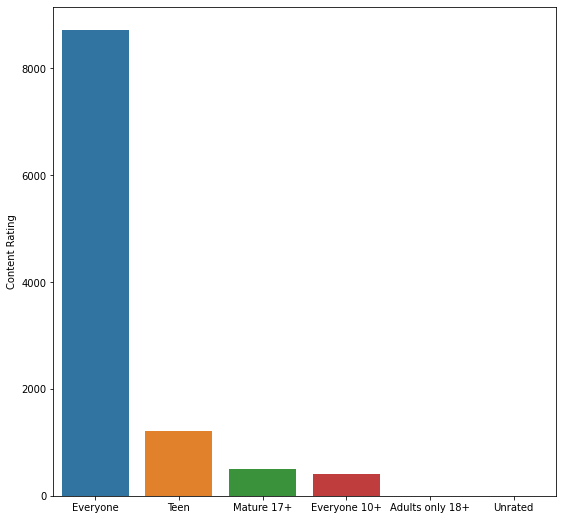

In [19]:
people = play_store_data["Content Rating"].value_counts()
plt.rcParams['figure.figsize'] = (9, 9) 
   
sns.barplot(y=people, x=people.index, data=play_store_data)

#7- Android Versions

*   In this todays era it is also advisable to an app developer to cope up with todays technologies and to do that they need better android version so in the above list we can say that the developer have to made that type of app which is working on android version 4.0 or above .
*   Because as the technologies are gonna improve day by day the user also demand for new thing means much more fast and efficient app meaning the higher the android version the moreit will work for user in future otherwise if the android version is low than it would not able to cope up with current devices or it will lag the app process resulting in uninstalling that app which an app developer dosen't wanted.



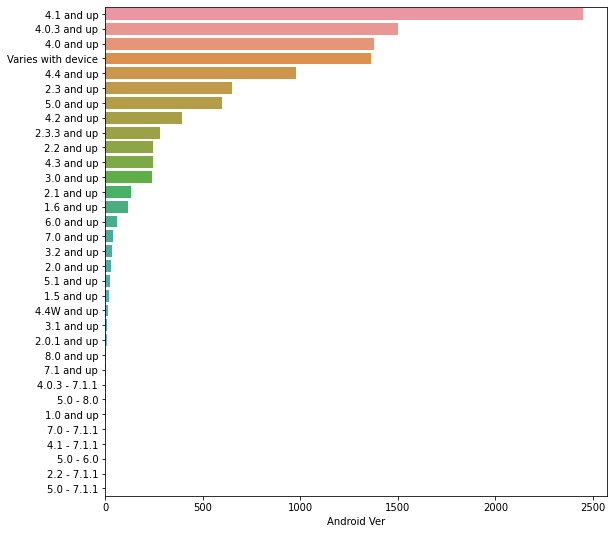

In [20]:

android_version = play_store_data["Android Ver"].value_counts()
plt.rcParams['figure.figsize'] = (9, 9) 
sns.barplot(x=android_version, y=android_version.index, data=play_store_data)

In [21]:
# Lets find out highest paid app 
price_list = play_store_data["Price"].max()

play_store_data.index[play_store_data["Price"] == 400]
play_store_data.iloc[4367]


App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                   7.3
Installs                           10000.0
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object

Above list state the most payable app 

😲 Seriously there's an app called I'm Rich - Trump Edition which is the highest paying app in this whole dataset and also the app cost around 400$ also don 't know how but it has got 10000+ installs also nevermind I am just analysing the data to find out the most paid app.



*  Now lets see the category wise selection from the data



## 8 - Gaming 

Now after seeing the most rated app its time to see whcih type of category is most downloaded by the people in the play store by seeong and analysing the above figure one can easily say that gaming category is the most favourite category and also in the given data it has around 1100 + gaming category.

Obviously gaming is that category that is loved by all age people from younger to adult to old ones also social media has help gaming industry to boom in the market many content creators upload their gaming videos on social media platform due to which people can get a glimps of that game and if the game was great it will definetly got downloaded by the people.

There are some other categories also like family ,tools ,sports which also have more categories then rests one.

By seeing this we can easily say that most of the developers prefers gaming categories to focus on as this category is most widely found in this data as it also got rating more than 4.7 also

Now lets see which type of gaming category is loved by the people 

In [22]:
#now lets see what kind of games people are playing
games = play_store_data[(play_store_data["Category"] == "GAME")]
#counting the category values 
games_played_by_most_of_the_people = games.groupby("Genres")['Category'].count().reset_index()
#now we want only those categories which are more than 5 
most_favourite_game_geners = games_played_by_most_of_the_people[(games_played_by_most_of_the_people["Category"] >= 5 )]

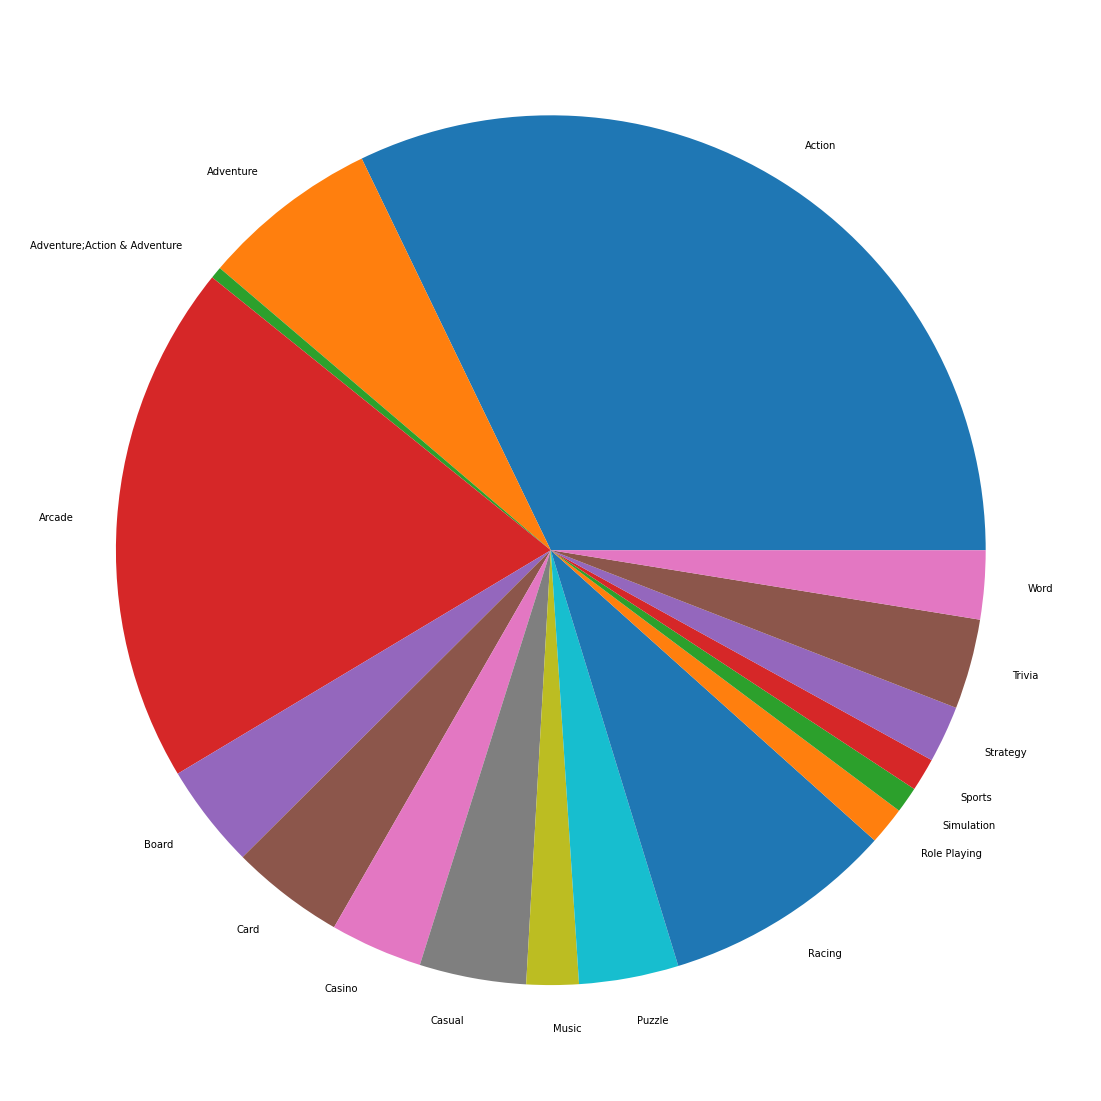

In [23]:
fig = plt.figure(figsize =(20, 20))
plt.pie(most_favourite_game_geners["Category"], labels = most_favourite_game_geners["Genres"])
 
# show plot
plt.show()



*   Seeing the pie chart we can say the action and arcade category is most likely to get picked up by a new user also casual,puzzel ,word and other different category are there but action and arcade have high numbers



*  There are lots of example available like pubg it has got engaged millions of people all around the world and the category of that game is also action one in that game one has to survive in the island along with his other 3 teammates and have to survive until they become no 1 by applying different tactics you also know that famouse  quote of the game WINNER WINNER CHIKEN DINNER



*  It is not that only action games are downloaded but other categories are also in race some have thier pros and some have their cons depending on the user need







## 9- Reviews

lets see the review hoe much reviews a category has got 

In [24]:
# sorting and cleaning the data
play_store_data['Reviews'] = play_store_data.Reviews.replace("0.0",0)
play_store_data['Reviews'] = play_store_data.Reviews.replace("3.0M",3000000.0)
play_store_data['Reviews'] = play_store_data['Reviews'].astype(float)
play_store_data['Reviews'].dtype

dtype('float64')

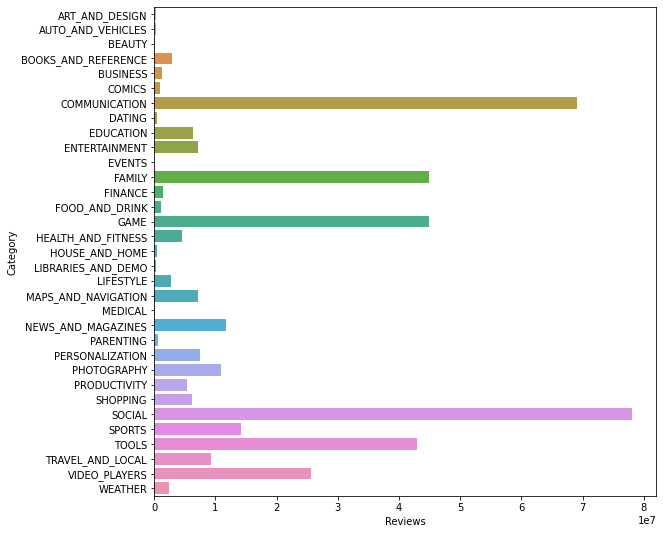

In [25]:
# catching the max review from the app
reviews_per_category = play_store_data.groupby("Category")["Reviews"].max()
sns.barplot(x = reviews_per_category , y = reviews_per_category.index , data = play_store_data)

see social communicaton ,game, family are the hottest category people are reviewing this show tgat this type of category must be downloaded more by users.

## 10 - Lets see the correlation and how one is corelate with each other

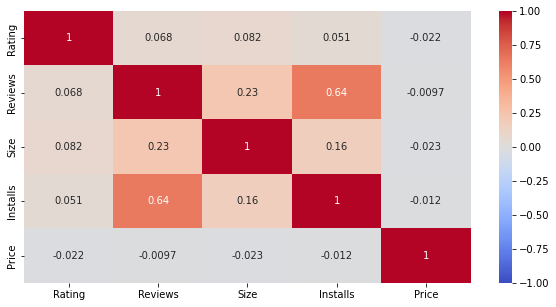

In [26]:
play_store_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(play_store_data.corr(), vmin=-1, cmap='coolwarm', annot=True)

you can easily understand from the corelation that if the rating is 1 than all the different values with respect to when review is 1 are present in box 

## **11** - Now lets see what about review and how reviews affect the apps engagement 



* In the given data you can see twobit confusing terms sentiment polarity and sentiment subjectivity

     Sentiment polarity means  [-1,1] either the review is 1 (positive) or -1 (Negative).it has got only two values -1 or +1

     Sentiment subjectivity is from[0,1] mean if it is 0 than it is bad and 1 than it is good wise versa in in between values ie 0.4 is bad compare to 0.5 like that it has got all values from 0 to 1 

     Now lets see both positive reviews and negative reviews




In [27]:
positive_review = play_store_review[(play_store_review["Sentiment"] == "Positive") &(play_store_review['Sentiment_Polarity'] == 1.000000)]
positive_mean = positive_review.describe()
positive_mean

,Sentiment_Polarity,Sentiment_Subjectivity
count,959.0,959.000000
mean,1.0,0.713601
std,0.0,0.309575
min,1.0,0.300000
25%,1.0,0.300000
50%,1.0,0.780000
75%,1.0,1.000000
max,1.0,1.000000


In [28]:
negative_review = play_store_review[(play_store_review["Sentiment"] == "Negative") &(play_store_review['Sentiment_Polarity'] == -1.000000)]
negative_mean = negative_review.describe()
negative_mean

,Sentiment_Polarity,Sentiment_Subjectivity
count,234.0,234.000000
mean,-1.0,0.988803
std,0.0,0.053786
min,-1.0,0.400000
25%,-1.0,1.000000
50%,-1.0,1.000000
75%,-1.0,1.000000
max,-1.0,1.000000




*   As you can easily see as I have create different means for both and positive and negative review we can easily say that negative reviews are perfect by user its value its touching its sunjectivity upto 1 means 0.988 from the given data while the positive review subjectivity is only upto 0.71 this suggest that all the negative review which are reviwed by user all are correct mostly while in positive review sometimes it was a robot who is giving this type of positive review so we cannot able to identify proper.

*   In todays eras there are lots of robot which can perform some task which he was given by the developers ie to promote their app an developer can use that bots help by commanding the bot that give a positive review so I mean to say not all the reviews are bots review but there are some reviews also i am not saying negative reviews are perfect ones there also bots are present but compare to positve ones there are less bots because no one wants to present their negative value they wants only positive review .



Now also there are some app in our data who got both positive as well as negative value lets sort also them and understand what the data is saying

In [29]:
# by merging both positive and negative data with taking common element as app
common_review = pd.merge(positive_review,negative_review,how = 'inner',left_on = "App",right_on = "App")
common_review.describe()

,Sentiment_Polarity_x,Sentiment_Subjectivity_x,Sentiment_Polarity_y,Sentiment_Subjectivity_y
count,333.0,333.000000,333.0,333.000000
mean,1.0,0.707297,-1.0,0.993844
std,0.0,0.306715,0.0,0.038413
min,1.0,0.300000,-1.0,0.400000
25%,1.0,0.300000,-1.0,1.000000
50%,1.0,0.750000,-1.0,1.000000
75%,1.0,1.000000,-1.0,1.000000
max,1.0,1.000000,-1.0,1.000000




*   See what i am saying in the above para that for common app also the negative review are touching the subjectivity till 1 while positive review are still at 0.7 I am not saying that all the review are correct but you have see and focus on the correct review and yes if you want to clarrify wheather the review is correct or not you can just mail that particular person and directly ask them how the app was .






*   By seeing the mean value of above data a developer must focus on the negative reviews more like what kind of difficulties are faced by the user to use that particular app by this when the developer is developing new app he  or updating the app he or she can easily find the solution and fix that issue so that next time no one can face that issue again




# **Conclusion**

# By analysing the data I can say

*   The more the rating to an app means 4 and above also it suggest good working and overall experience by the user the it has highly chances to be downloaded
*   The more the number of downloads means people are enjoying by that app to download it ie how the pubg got downloaded by billions of biliions people because it entertains the people also it comes in action category as above we analysis how the gaming category is mostly used by developer also people love to play game .Gaming categories have nothing co relation with age so everyone can play it from all over the earth.We have also see in gaming action categories are mostly in demand again take example as pubg and call of duty , free fire and many more.



*   Also we analysis the most payable app although there are not more no of downloads people dont install payable app and also they are not also good for common people so payable app are not that much install by people.
*   The app should be designed in that way that everyone should be able to use it.

*   The developer needs to focus on the future also so they have to see the android version which is currently in boom in the market because old ones get replaced by new so the new the android version the more fast and efficient it will work .
*   The size of app dosen't much affect the user because if an small application can give the user what he wants than he doens't need to download bigger SIZE MB app what i mean to say if there is lighter version available of that app the people will prefer that because it is going to perform the same function as the bigger one also it takes up less storage space in device so in both way user get happy.


*  Review althought there are both positive and negative review in the given data negative reviews are highly correct by users because it gives us the data that this app is not worth to install oe there are some bugs in that app so the app developer should morefocus on negative review ans see them as feedback from the user if they correct the bug then the app will run smoothly and yes regarding positive review in todays era there are lots of bot are there to give fake correct review so i am not saying dont focus on positive review but there are reviews that are full of positivity you can easily understnad it by reading it .


*   Developers should more focus on gaming , family and communication category



*  So thats it from my side there are other lots of factors there also like compatibilty with device,ram ,storage of device and many more technology is full of surprises.







